In [2]:
# imports
import pandas as pd
import numpy as np
import findiff
from os import listdir
from sklearn.manifold import MDS
from scipy.stats import wasserstein_distance as wd
from matplotlib import pyplot as plt
import seaborn as sns         
from mvlearn.embed import MVMDS
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
data = pd.read_csv('SyncDataForModPulseStage.csv', sep=(';'))


In [2]:
ddd = pd.read_csv('Sync Data/triad_1_trial_6_-1_.csv', sep=(','), header=None)
header = ['triad','trial','emo','per1','per2','per3']
ddd.columns = header
ddd = ddd.drop(0)
ddd

,triad,trial,emo,per1,per2,per3
1,1.0,6.0,-1.0,0.000537,0.000934,-0.005242
2,1.0,6.0,-1.0,0.000433,0.000870,-0.004276
3,1.0,6.0,-1.0,0.000335,0.000802,-0.003365
4,1.0,6.0,-1.0,0.000246,0.000732,-0.002550
5,1.0,6.0,-1.0,0.000169,0.000660,-0.001849
...,...,...,...,...,...,...
2396,1.0,6.0,-1.0,-0.001083,-0.004651,-0.000182
2397,1.0,6.0,-1.0,-0.001236,-0.004794,-0.000371
2398,1.0,6.0,-1.0,-0.001392,-0.004883,-0.000553
2399,1.0,6.0,-1.0,-0.001542,-0.004926,-0.000723


In [74]:
len(listdir("testt"))

897

In [23]:


tmps = listdir("testt")

distributions=[]
for tmp in tmps:
    #read data
    try:
        data = pd.read_csv("testt/"+tmp,sep=",")
        # data = data.drop(columns=data.columns[-1]) #delete useless NA filled last column
    except pd.errors.ParserError: #contains "DROPOUT" as values for some sensors at the end, separated with spaces and not tabs, which messes up the parsins 
        data = pd.read_csv("testt/"+tmp,sep=",")


    distribution = []
    for index, value in data.iloc[:,-1].iteritems():
        distribution.append(np.histogram(value,bins=101,range=[0,500])[0])
    
    distributions.append(distribution)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18148\4238198735.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data.iloc[:,-1].iteritems():
C:\Users\DELL\AppData\Local\Temp\ipykernel_18148\4238198735.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data.iloc[:,-1].iteritems():
C:\Users\DELL\AppData\Local\Temp\ipykernel_18148\4238198735.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data.iloc[:,-1].iteritems():
C:\Users\DELL\AppData\Local\Temp\ipykernel_18148\4238198735.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data.iloc[:,-1].iteritems():
C:\Users\DELL\AppData\Local\Temp\ipykernel_18148\4238198735.py:14: FutureWarning: iteritems is deprecated and will be removed in

In [24]:
len(distributions[0])

2400

In [ ]:
#processing the wassenstein distances and making the distance matrix for MDS (! for the first captor !)
nb_mvt = len(tmps) #nombre de mouvements
nb_sensors = len(distributions[0])
Xs = []
# nb_sensors = 1500


for k in range(nb_sensors):
    w_dist=np.empty((nb_mvt,nb_mvt))
    for i in range(nb_mvt):
        w_dist[i][i]=0
        for j in range(i+1,nb_mvt):
            w_dist[i][j] = w_dist[j][i] = wd(distributions[i][k],distributions[j][k])
    Xs.append(w_dist)
        
print(len(Xs))


In [7]:
#using MVMDS
mds = MVMDS(n_components=2, dissimilarity='precomputed')
pts = mds.fit_transform(Xs)
mds.__dict__

{'components_': array([[-0.02289079, -0.03055562],
        [-0.03639823, -0.07920967],
        [ 0.0482141 , -0.0308133 ],
        [-0.05757652,  0.03203544],
        [ 0.01687728, -0.02279128],
        [ 0.07791358, -0.01268485],
        [-0.05072134,  0.06944378],
        [-0.02656919, -0.04295837],
        [-0.01187153, -0.0304532 ],
        [-0.0511897 ,  0.07440335],
        [ 0.00532422, -0.06662198],
        [ 0.09860785, -0.02825475],
        [ 0.02374975,  0.02692463],
        [-0.04764554,  0.06686348],
        [-0.05027168,  0.02369436],
        [ 0.09591875, -0.01540992],
        [-0.08228228,  0.06833278],
        [-0.08791433,  0.07558071],
        [-0.00436444, -0.08917624],
        [ 0.06216093,  0.02972079],
        [-0.00583544, -0.01178372],
        [-0.03882019,  0.06715138],
        [ 0.11905465, -0.05340579],
        [ 0.03704741, -0.01855892],
        [ 0.03340823,  0.07969248],
        [ 0.02685659, -0.0228851 ],
        [-0.01268208, -0.03905566],
        [-0.0

<h1> Visualisation

In [23]:
pts.shape

(299, 2)

In [24]:
tmps = listdir("Sync Data")
len(tmps)

299

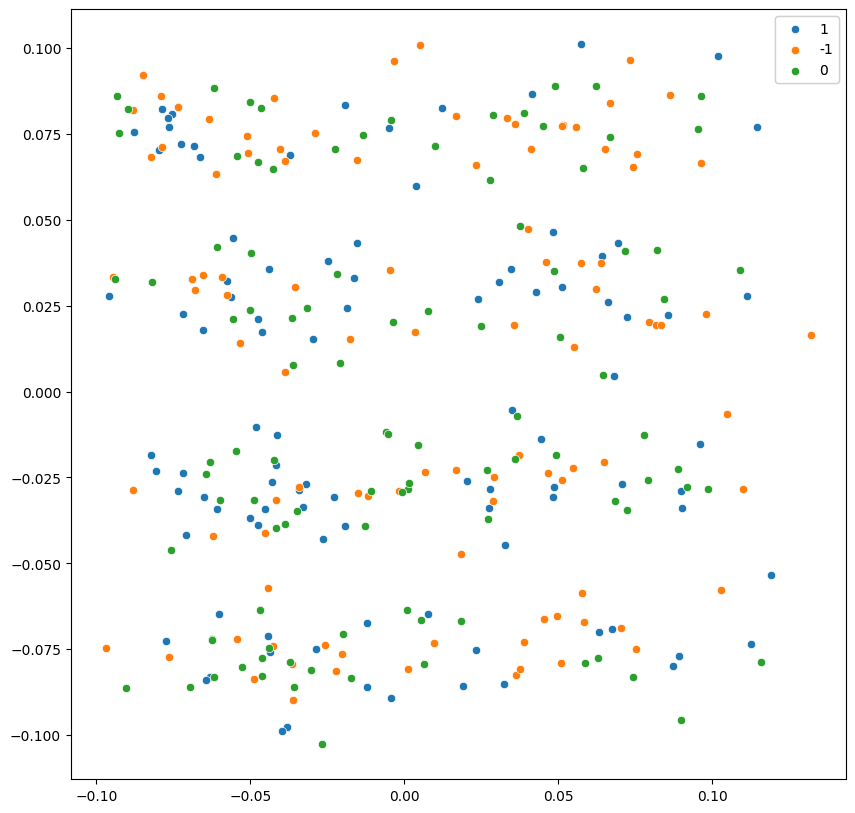

In [198]:
tmps = listdir("Sync Data") # current directory

#grp = { 'emotion' : [ [x1,x2] , [y1,y2] , color ] , ...}
grp = {}
for i in range(len(tmps)):
    tmp = tmps[i].split("_") # list of all names of files where are seperated by _
# print(tmp)
    #['ale', 'lift', 'an', '1', 'fin.csm']
    
    if tmp[-2] not in grp.keys():
         grp[tmp[-2]]=[[],[]]
    grp[tmp[-2]][0].append(pts[i][0])
    grp[tmp[-2]][1].append(pts[i][1])
fig = plt.figure(figsize=(10,10))
for i in range(len(grp.keys())):
    i = list(grp.keys())[i]
    ax = sns.scatterplot(x=grp[i][0], y=grp[i][1])
legend1 = ax.legend(grp.keys())
ax.add_artist(legend1)

<h1> Kmean and visualisation

In [25]:
kmeans = KMeans( n_clusters=3,random_state=0).fit(pts)
clusters = kmeans.labels_

c:\Users\DELL\anaconda3\envs\IMS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Scattering into 3 clusters')

<Figure size 1000x1000 with 0 Axes>

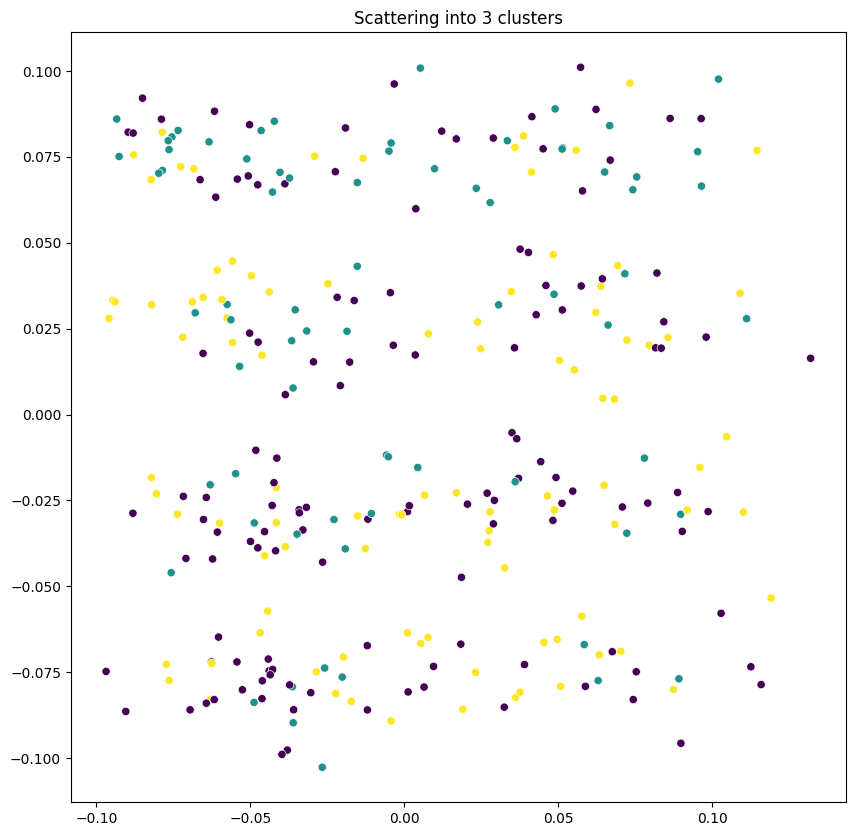

In [200]:
fig = plt.figure(figsize=(10,10))
X = []
Y = []
for i in range(len(pts)):
    X.append(pts[i][0])
    Y.append(pts[i][1])
fig = plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=X,y=Y,c=kmeans.labels_)
plt.title("Scattering into 3 clusters")

<h1>Evaluation

In [27]:
tmps = listdir("Sync Data") # current directory
ems = [] #TRUE emotions from file names
for i in tmps:
    ems.append(i.split("_")[-2])
emotions = [int(x) for x in ems]
ems = list(map(int,emotions))

In [28]:

from itertools import permutations
comb_predd=[]
categories = np.unique(ems)
label= list(kmeans.labels_)
labels = np.unique(label)
acc = []
kappa =[]
mcc = []
mappings = []
combinations = list(permutations(labels, len(labels)))

for combination in combinations:
    mapping = dict(zip(combination, categories))
    mappings.append(mapping)
    converted = [mapping[emo] for emo in label]
    comb_predd.append(converted)
    for i in range(len(comb_predd)):
        report_kmeans = metrics.classification_report(ems,comb_predd[i])
        accuracy =float(report_kmeans.split()[-14])
        kappa_kmean = metrics.cohen_kappa_score(ems,comb_predd[i])
        mcc_kmean = metrics.matthews_corrcoef(ems,comb_predd[i])
    mcc.append(mcc_kmean)
    acc.append(accuracy)
    kappa.append(kappa_kmean)
# print(acc)
best_acc = max(acc)
best_mcc = max(mcc)
best_kappa = max(kappa)
acc_idx= acc.index(best_acc)
mcc_idx= mcc.index(best_mcc)
kappa_idx= kappa.index(best_kappa)

print('best accuracy score:', best_acc,'with the cluster',mappings[acc_idx] )
print('best Matthews correlation coeficient:', best_mcc,'with the cluster',mappings[mcc_idx])
print('best kappa coeficient:', best_kappa,'with the cluster',mappings[kappa_idx])


best accuracy score: 0.37 with the cluster {2: -1, 1: 0, 0: 1}
best Matthews correlation coeficient: 0.05179626914659249 with the cluster {2: -1, 1: 0, 0: 1}
best kappa coeficient: 0.051558330396253904 with the cluster {2: -1, 1: 0, 0: 1}


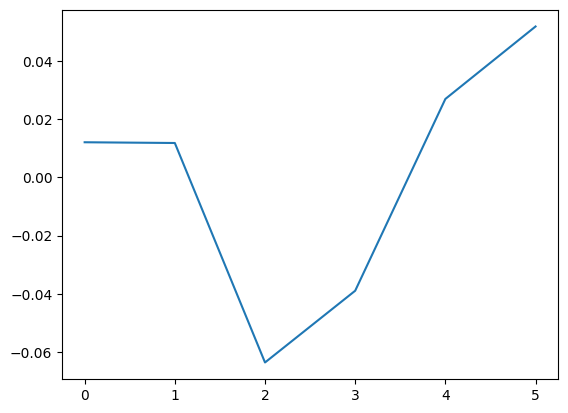

In [35]:
plt.plot(range(len(mcc)),mcc)

visualisation of detailed rapport about the atribution of emotion-to-cluster that gives the best accuracy (the value of comb_emo to write manually) 

<h3> trying other clustering methods

<h4> clustering methods

In [29]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3)
clusters_GM = model.fit_predict(pts)

Text(0.5, 1.0, 'Scattering into 3 clusters')

<Figure size 1000x1000 with 0 Axes>

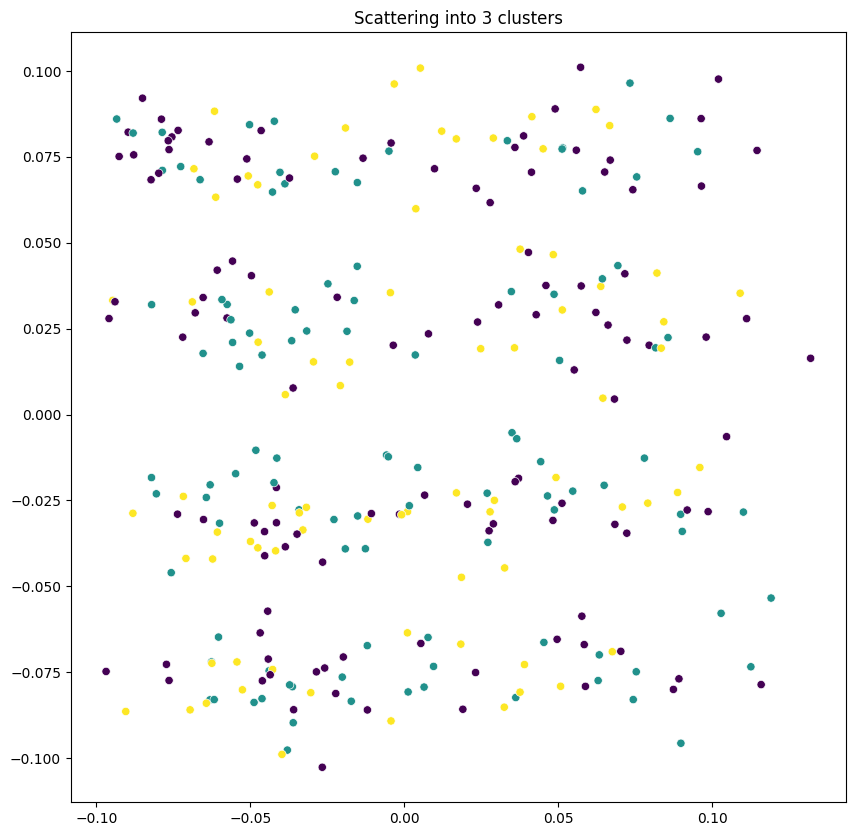

In [204]:
fig = plt.figure(figsize=(10,10))
X = []
Y = []
for i in range(len(pts)):
    X.append(pts[i][0])
    Y.append(pts[i][1])
fig = plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=X,y=Y,c=clusters_GM)
plt.title("Scattering into 3 clusters")

In [37]:
from itertools import permutations
comb_predd=[]
categories = np.unique(ems)
label= list(clusters_GM)
labels = np.unique(label)
acc = []
kappa =[]
mcc_gm= []
mappings = []
combinations = list(permutations(labels, len(labels)))

for combination in combinations:
    mapping = dict(zip(combination, categories))
    mappings.append(mapping)
    converted = [mapping[emo] for emo in label]
    comb_predd.append(converted)
    for i in range(len(comb_predd)):
        report = metrics.classification_report(ems,comb_predd[i])
        accuracy =float(report.split()[-14])
        kappa_= metrics.cohen_kappa_score(ems,comb_predd[i])
        mcc_= metrics.matthews_corrcoef(ems,comb_predd[i])
    mcc_gm.append(mcc_)
    acc.append(accuracy)
    kappa.append(kappa_)
# print(acc)
best_acc = max(acc)
best_mcc = max(mcc_gm)
best_kappa = max(kappa)
acc_idx= acc.index(best_acc)
mcc_idx= mcc_gm.index(best_mcc)
kappa_idx= kappa.index(best_kappa)

print('best accuracy score:', best_acc,'with the cluster',mappings[acc_idx] )
print('best Matthews correlation coeficient:', best_mcc,'with the cluster',mappings[mcc_idx])
print('best kappa coeficient:', best_kappa,'with the cluster',mappings[kappa_idx])


best accuracy score: 0.36 with the cluster {1: -1, 0: 0, 2: 1}
best Matthews correlation coeficient: 0.03664751760171677 with the cluster {1: -1, 0: 0, 2: 1}
best kappa coeficient: 0.03642284064587609 with the cluster {1: -1, 0: 0, 2: 1}


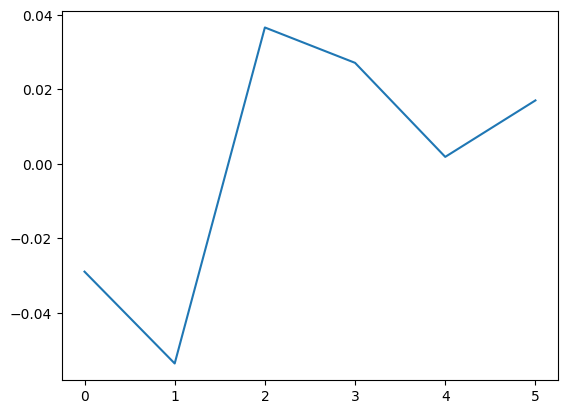

In [38]:
plt.plot(range(len(mcc_gm)),mcc_gm)

In [ ]:
prediction_GM=list(clusters_GM)  # try different dimentions 
report_GM = metrics.classification_report(ems,prediction_GM)
print(report_GM)

In [31]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=3)
clusters_B = model.fit_predict(pts)

In [39]:
from itertools import permutations
comb_predd=[]
categories = np.unique(ems)
label= list(clusters_B)
labels = np.unique(label)
acc = []
kappa =[]
mcc_b= []
mappings = []
combinations = list(permutations(labels, len(labels)))

for combination in combinations:
    mapping = dict(zip(combination, categories))
    mappings.append(mapping)
    converted = [mapping[emo] for emo in label]
    comb_predd.append(converted)
    for i in range(len(comb_predd)):
        report = metrics.classification_report(ems,comb_predd[i])
        accuracy =float(report.split()[-14])
        kappa_= metrics.cohen_kappa_score(ems,comb_predd[i])
        mcc_= metrics.matthews_corrcoef(ems,comb_predd[i])
    mcc_b.append(mcc_)
    acc.append(accuracy)
    kappa.append(kappa_)
# print(acc)
best_acc = max(acc)
best_mcc = max(mcc_b)
best_kappa = max(kappa)
acc_idx= acc.index(best_acc)
mcc_idx= mcc_b.index(best_mcc)
kappa_idx= kappa.index(best_kappa)

print('best accuracy score:', best_acc,'with the cluster',mappings[acc_idx] )
print('best Matthews correlation coeficient:', best_mcc,'with the cluster',mappings[mcc_idx])
print('best kappa coeficient:', best_kappa,'with the cluster',mappings[kappa_idx])


best accuracy score: 0.35 with the cluster {1: -1, 0: 0, 2: 1}
best Matthews correlation coeficient: 0.03310398996275101 with the cluster {2: -1, 1: 0, 0: 1}
best kappa coeficient: 0.03241113346747149 with the cluster {2: -1, 1: 0, 0: 1}


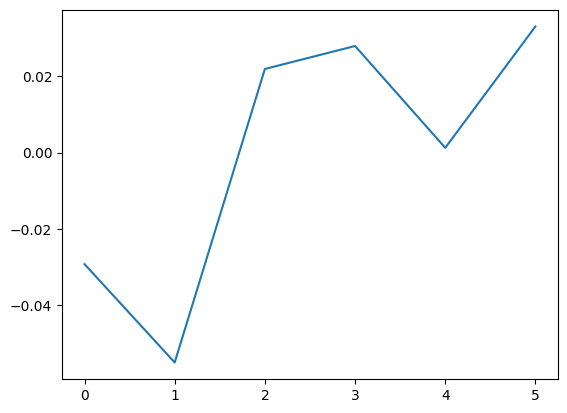

In [41]:
plt.plot(range(len(mcc_b)),mcc_b)

In [ ]:
prediction_B=list(clusters_B)
report_B = metrics.classification_report(ems,prediction_B)
print(report_B)

In [33]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3)
clusters_SC = model.fit_predict(pts)

In [40]:
from itertools import permutations
comb_predd=[]
categories = np.unique(ems)
label= list(clusters_SC)
labels = np.unique(label)
acc = []
kappa =[]
mcc_sc= []
mappings = []
combinations = list(permutations(labels, len(labels)))

for combination in combinations:
    mapping = dict(zip(combination, categories))
    mappings.append(mapping)
    converted = [mapping[emo] for emo in label]
    comb_predd.append(converted)
    for i in range(len(comb_predd)):
        report = metrics.classification_report(ems,comb_predd[i])
        accuracy =float(report.split()[-14])
        kappa_= metrics.cohen_kappa_score(ems,comb_predd[i])
        mcc_= metrics.matthews_corrcoef(ems,comb_predd[i])
    mcc_sc.append(mcc_)
    acc.append(accuracy)
    kappa.append(kappa_)
# print(acc)
best_acc = max(acc)
best_mcc = max(mcc_sc)
best_kappa = max(kappa)
acc_idx= acc.index(best_acc)
mcc_idx= mcc_sc.index(best_mcc)
kappa_idx= kappa.index(best_kappa)

print('best accuracy score:', best_acc,'with the cluster',mappings[acc_idx] )
print('best Matthews correlation coeficient:', best_mcc,'with the cluster',mappings[mcc_idx])
print('best kappa coeficient:', best_kappa,'with the cluster',mappings[kappa_idx])


best accuracy score: 0.37 with the cluster {2: -1, 1: 0, 0: 1}
best Matthews correlation coeficient: 0.05179626914659249 with the cluster {2: -1, 1: 0, 0: 1}
best kappa coeficient: 0.051558330396253904 with the cluster {2: -1, 1: 0, 0: 1}


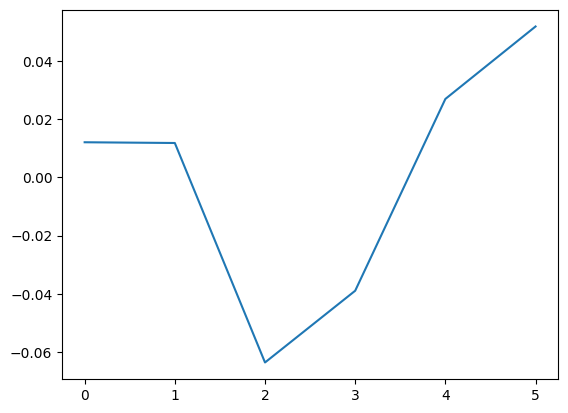

In [42]:
plt.plot(range(len(mcc_sc)),mcc_sc)


In [ ]:
prediction_SC=list(clusters_SC)
report_SC = metrics.classification_report(ems,prediction_SC)
print(report_SC)

<h4> visualisation of the clusters

Text(0.5, 1.0, 'Scattering into 3 clusters')

<Figure size 1000x1000 with 0 Axes>

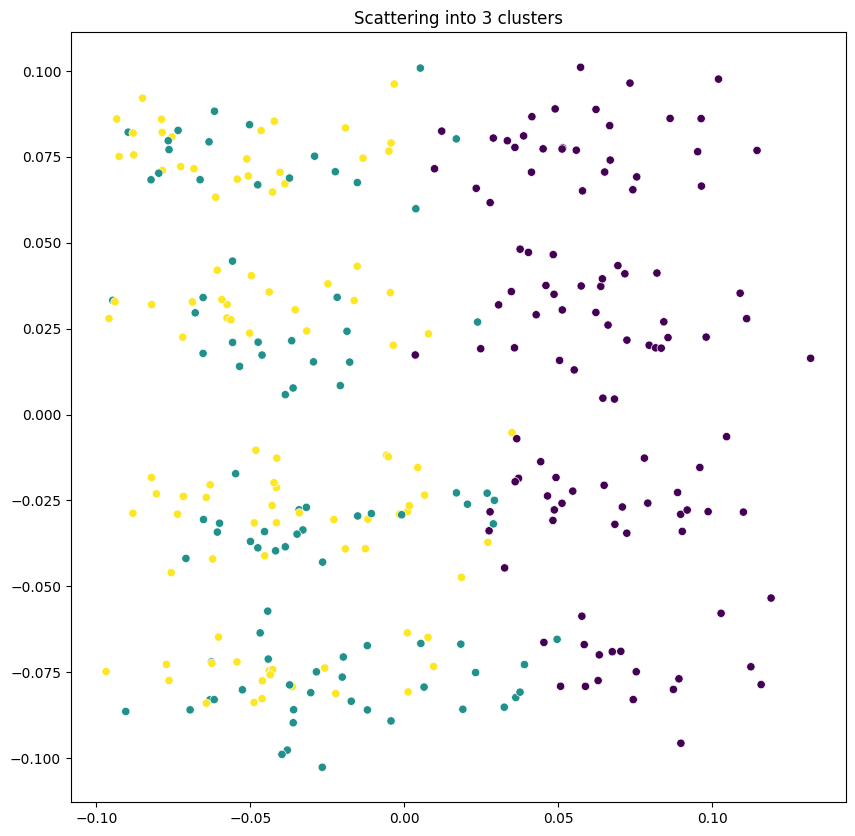

In [171]:
fig = plt.figure(figsize=(10,10))
X = []
Y = []
for i in range(len(pts)):
    X.append(pts[i][0])
    Y.append(pts[i][1])
fig = plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=X,y=Y,c=clusters)
plt.title("Scattering into 3 clusters")